# Plotting and Visualization

# A Brief matplotlib API Primer

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

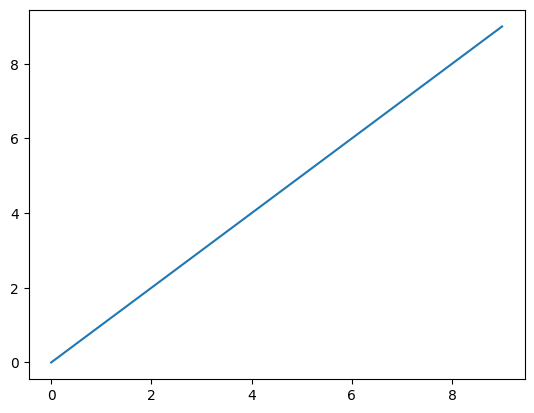

In [5]:
plt.plot(data)

## Figures and Subplots

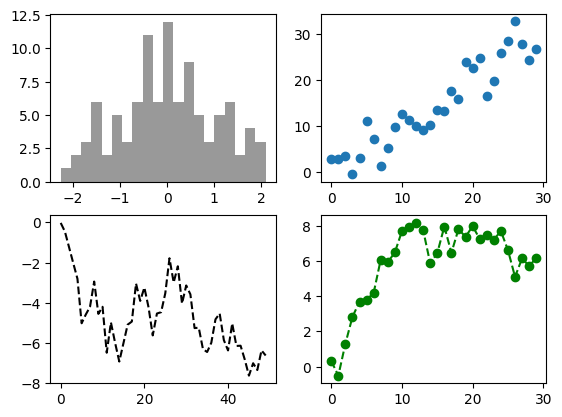

In [68]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# alpha 是指透明度
ax1.hist(np.random.standard_normal(100),bins=20,
         color='black',alpha=0.4)

ax2.scatter(np.arange(30),np.arange(30)
            +3*np.random.standard_normal(30))

ax3.plot(np.random.standard_normal(50).cumsum(),
         color='black',linestyle='dashed')

ax4.plot(np.random.standard_normal(30).cumsum(),color='green',
        linestyle='dashed',marker='o')

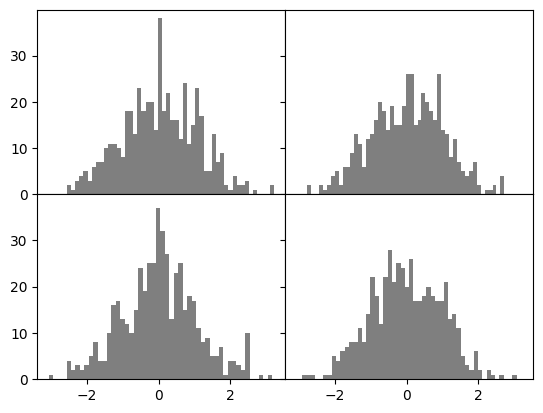

In [39]:
fig, axes = plt.subplots(2,2, sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.standard_normal(500),bins=50,
                       color='black',alpha=0.5)

fig.subplots_adjust(wspace=0, hspace=0)

## matplotlib.pyplot.subplots options (form)

|Argument	|Description|
|-|-|
|nrows	|Number of rows of subplots|
||子图的行数|
|ncols	|Number of columns of subplots|
||子图的列数|
|sharex	|All subplots should use the same x-axis ticks (adjusting the xlim will affect all subplots)|
||所有子图应使用相同的 x 轴刻度（调整xlim将影响所有子图）|
|sharey	|All subplots should use the same y-axis ticks (adjusting the ylim will affect all subplots)|
||所有子图应使用相同的 y 轴刻度（调整ylim将影响所有子图）
|subplot_kw	|Dictionary of keywords passed to add_subplot call used to create each subplot|
||传递给add_subplot调用用于创建每个子图的关键字字典|
|**fig_kw	|Additional keywords to subplots are used when creating the figure, such as plt.subplots(2, 2, figsize=(8, 6))|
||创建图形时使用subplots的附加关键字，例如plt.subplots(2, 2, figsize=(8, 6))|

## Colors, Markers, and Line Styles

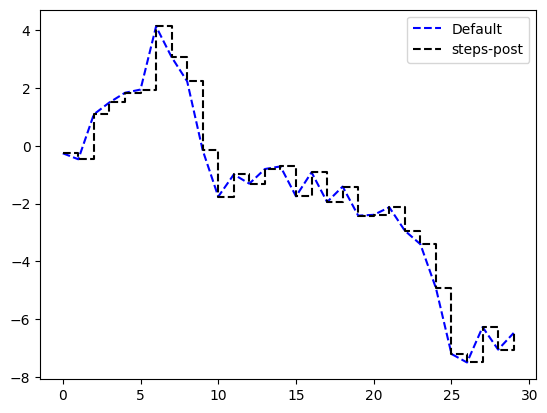

In [74]:
fig = plt.figure()
ax = fig.add_subplot()

data = np.random.standard_normal(30).cumsum()

ax.plot(data, color = 'blue', linestyle='dashed',label='Default')
ax.plot(data, color = 'black',linestyle='dashed',
        drawstyle='steps-post',label='steps-post')
ax.legend()

## Ticks, Labels, and Legends

[Text(0.5, 1.0, 'My first matplotlib plot'), Text(0.5, 0, 'Stages')]

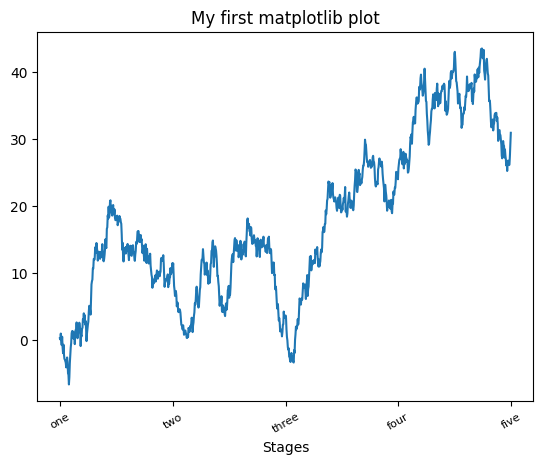

In [86]:
fig,ax=plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())

# 设置 x 轴刻度和标签
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                            rotation=30,fontsize=8)
#ax.set_xlabel('stages')
#ax.set_title("My first matplotlib plot")
ax.set(title="My first matplotlib plot", xlabel="Stages")

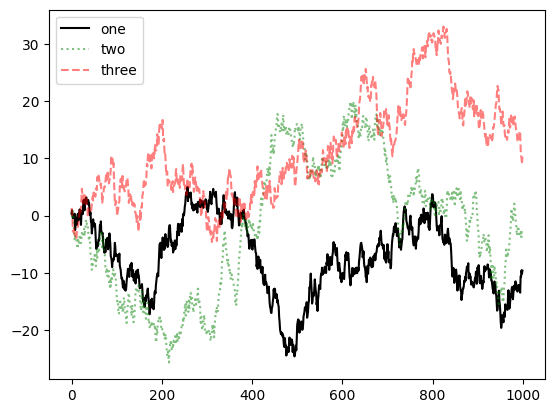

In [88]:
fig,ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(),color='black',label='one')
ax.plot(np.random.randn(1000).cumsum(),color='green',label='two',alpha=0.5,linestyle='dotted')
ax.plot(np.random.randn(1000).cumsum(),color='red',label='three',alpha=0.5,linestyle='dashed')
ax.legend()

# Annotations and Drawing on a Subplot

In [90]:
from datetime import datetime

Text(0.5, 1.0, 'Important dates in the 2008–2009 financial crisis')

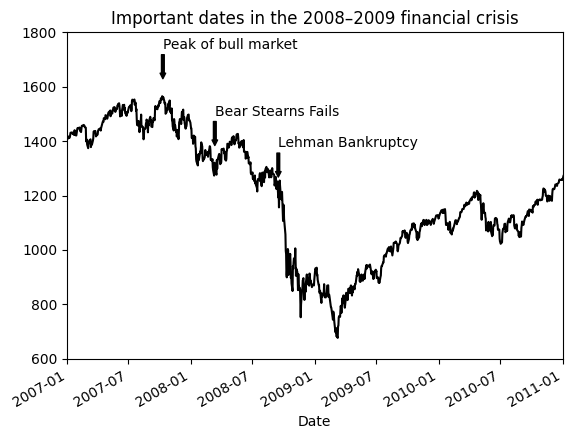

In [98]:
fig,ax = plt.subplots()
data = pd.read_csv('/Users/qian/Desktop/DATA/WESM/spx.csv',index_col=0,parse_dates = True)
spx = data['SPX']

spx.plot(ax=ax, color='black')

crisis_data=[
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    #The ax.annotate method can draw labels at the indicated x and y coordinates. 
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

#zoom in on 2007-2010
#设置x,y的limit
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])

ax.set_title("Important dates in the 2008–2009 financial crisis")

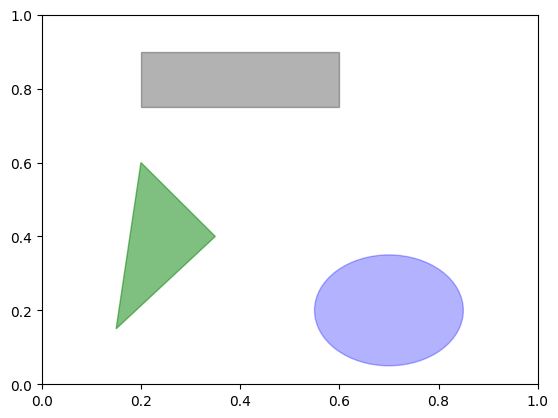

In [107]:
#add shapes to graph
fig,ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)


## Saving Plots to File

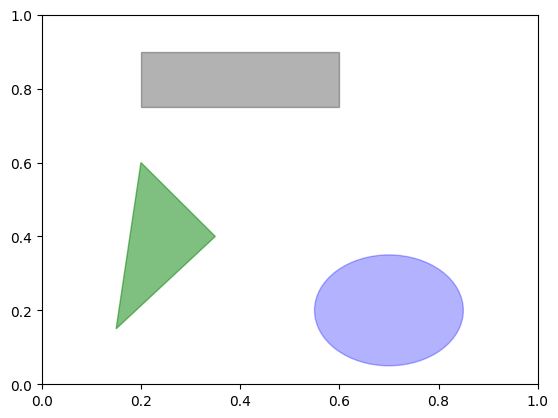

In [106]:
fig,ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

fig.savefig('figpath.svg')
fig.savefig('figpath.png',dpi=400)

## Some fig.savefig options (form)

|Argument	|Description|
|-|-|
|fname	|String containing a filepath or a Python file-like object. The figure format is inferred from the file extension (e.g., .pdf for PDF or .png for PNG).|
||包含文件路径或类似 Python 文件的对象的字符串。图形格式是从文件扩展名推断出来的（例如，PDF 为.pdf ，PNG 为.png ）。|
|dpi	|The figure resolution in dots per inch; defaults to 100 in IPython or 72 in Jupyter out of the box but can be configured.|
||以每英寸点数为单位的图形分辨率；在 IPython 中默认为 100，在 Jupyter 中默认为 72，但可以配置。|
|facecolor, edgecolor	|The color of the figure background outside of the subplots; "w" (white), by default.|
||子图之外的图形背景颜色；默认情况下为"w" （白色）。|
|format	|The explicit file format to use ("png", "pdf", "svg", "ps", "eps", ...).|
||要使用的显式文件格式（ "png" 、 "pdf" 、 "svg" 、 "ps" 、 "eps"等）。|

## matplotlib Configuration matplotlib

In [111]:
# to set the global default figure size to be 10 × 10
plt.rc("figure", figsize=(10, 10))

plt.rcdefaults()

In [110]:
plt.rc("font", family="monospace", weight="bold", size=8)

# Plotting with pandas and seaborn

## Line Plots

In [116]:
# x-axis ticks and limits can be adjusted with the xticks and xlim
# y-axis respectively with yticks and ylim
s = pd.Series(np.random.standard_normal(10).cumsum(),index=np.arange(0,
 100, 10))

<Axes: >

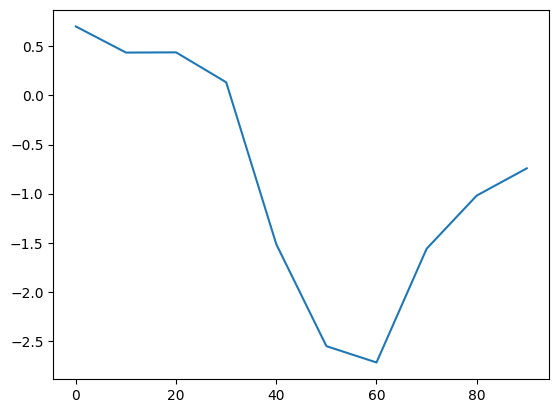

In [117]:
s.plot()

<Axes: >

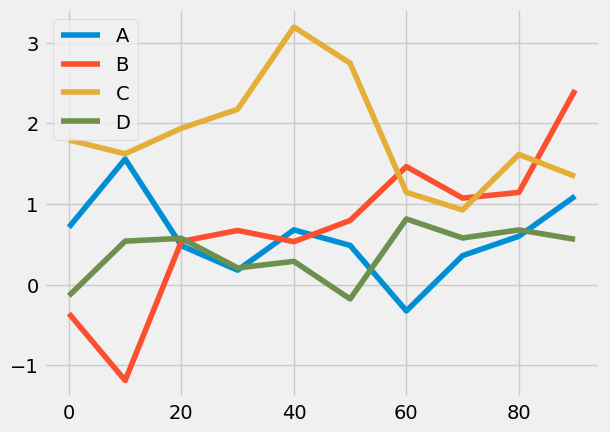

In [133]:
# creat DataFrame
df = pd.DataFrame(np.random.standard_normal((10,4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))

#Set draw style
plt.style.use('fivethirtyeight')

#generate the graph
df.plot()

## Series.plot method arguments (form)

|Argument	|Description|
|-|-|
|label	|Label for plot legend| 
|ax	|matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot|
||要绘制的 matplotlib 子图对象；如果没有通过，则使用活动的 matplotlib 子图|
|style	|Style string, like "ko--", to be passed to matplotlib|
||样式字符串，如"ko--" ，传递给 matplotlib|
|alpha	|The plot fill opacity (from 0 to 1)|
||透明度（从 0 到 1）|
|kind	|Can be "area", "bar", "barh", "density", "hist", "kde", "line", or "pie"; defaults to "line"|
|figsize	|Size of the figure object to create|
||要创建的图形对象的大小|
|logx	|Pass True for logarithmic scaling on the x axis; pass "sym" for symmetric logarithm that permits negative values|
||通过True可以在 x 轴上进行对数缩放；传递"sym"作为允许负值的对称对数|
|logy	|Pass True for logarithmic scaling on the y axis; pass "sym" for symmetric logarithm that permits negative values|
||通过True可以在 y 轴上进行对数缩放；传递"sym"作为允许负值的对称对数|
|title	|Title to use for the plot|
||用于情节的标题|
|use_index	|Use the object index for tick labels|
||使用刻度标签的对象索引|
|rot	|Rotation of tick labels (0 through 360)|
||旋转（0 到 360）|
|xticks	|Values to use for x-axis ticks|
||用于 x 轴刻度的值|
|yticks	|Values to use for y-axis ticks|
||用于 y 轴刻度的值|
|xlim	|x-axis limits (e.g., [0, 10])|
||x 轴限制（例如， [0, 10] ）|
|ylim	|y-axis limits |
||y 轴限制|
|grid	|Display axis grid (off by default)|
||显示轴网格（默认关闭）|

## DataFrame-specific plot arguments (form)

|Argument	|Description|
|-|-|
|subplots	|Plot each DataFrame column in a separate subplot|
||在单独的子图中绘制每个 DataFrame 列|
|layouts	|2-tuple (rows, columns) providing layout of subplots|
||提供子图布局的 2 元组（行、列）|
|sharex	|If subplots=True, share the same x-axis, linking ticks and limits|
||如果subplots=True ，则共享相同的 x 轴，链接刻度和限制|
|sharey	|If subplots=True, share the same y-axis|
||如果subplots=True ，则共享相同的 y 轴|
|legend	|Add a subplot legend (True by default)|
||添加子图图例（默认为True ）|
|sort_columns	|Plot columns in alphabetical order; by default uses existing column order|
||按字母顺序绘制列；默认情况下使用现有的列顺序|

## Bar Plots

<Axes: >

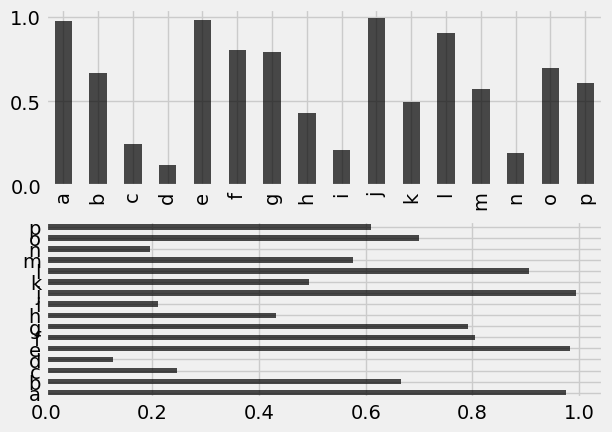

In [137]:
#plot.bar() - 垂直条形图
#plot.barh()- 水平条形图
fig,axes = plt.subplots(2,1)
data = pd.Series(np.random.uniform(size=16),index=list("abcdefghijklmnop"))

data.plot.bar(ax=axes[0],color='black',alpha=0.7)
data.plot.barh(ax=axes[1],color='black',alpha=0.7)

In [138]:
df=pd.DataFrame(np.random.uniform(size=(6,4)),
                index=["one", "two", "three", "four", "five", "six"],
                columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.593554,0.798641,0.452357,0.000766
two,0.062343,0.901069,0.196378,0.677185
three,0.948355,0.733941,0.051451,0.247256
four,0.844124,0.567499,0.557068,0.644091
five,0.902474,0.478797,0.711001,0.736859
six,0.713845,0.813043,0.029538,0.062690


<Axes: >

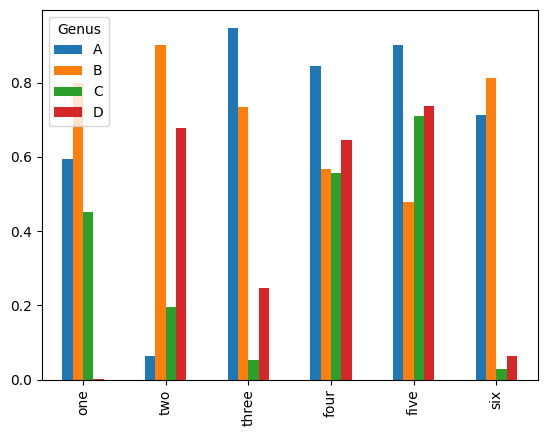

In [141]:
plt.style.use('default')
df.plot.bar()

<Axes: >

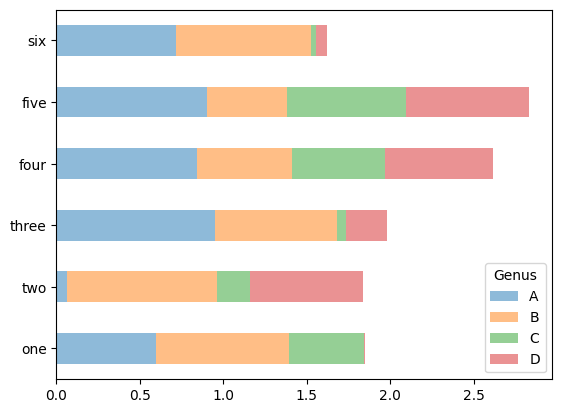

In [142]:
df.plot.barh(stacked=True, alpha=0.5)

In [144]:

tips = pd.read_csv('/Users/qian/Desktop/DATA/WESM/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [146]:
party_counts=pd.crosstab(tips['day'],tips['size'])
party_counts = party_counts.reindex(index=['Thur','Fri','Sat','Sun'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [149]:
party_counts=party_counts.loc[:,2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [150]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"),axis="index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

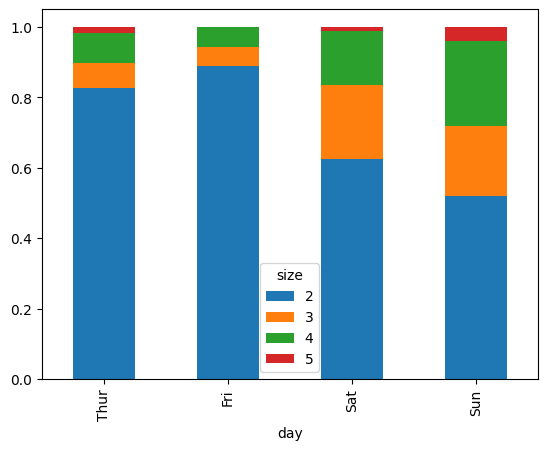

In [151]:
party_pcts.plot.bar(stacked=True)

In [152]:
import seaborn as sns

In [154]:
tips['tip_pct'] = tips['tip'] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

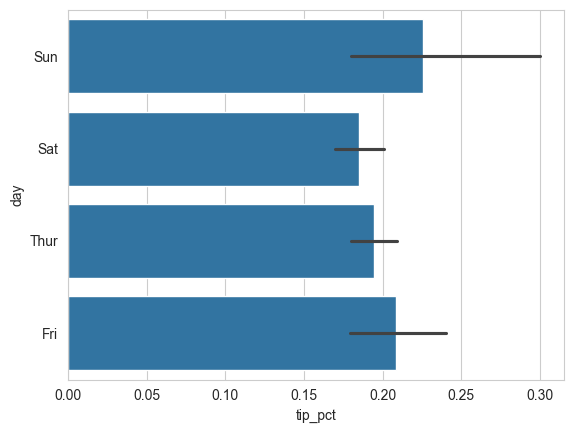

In [158]:
sns.barplot(x='tip_pct',y='day',data=tips,orient='h')

<Axes: xlabel='tip_pct', ylabel='day'>

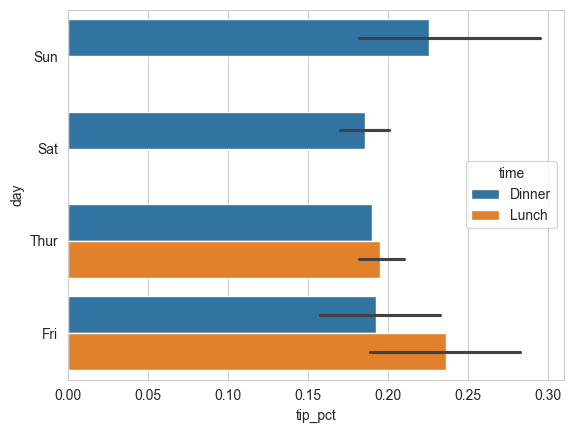

In [157]:
# hue option that enables us to split by an additional categorical value
sns.set_style('whitegrid')
sns.barplot(x='tip_pct',y='day',hue='time',data=tips,orient='h')

## Histograms and Density Plots

<Axes: ylabel='Frequency'>

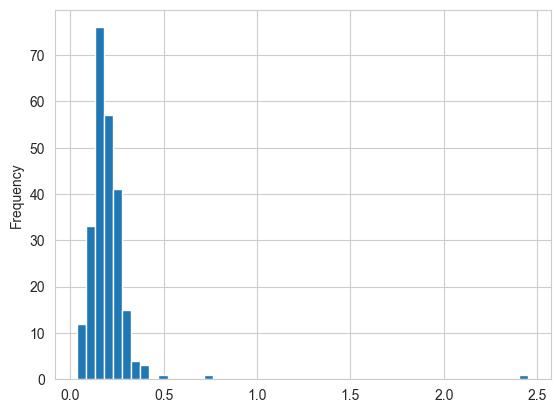

In [159]:
tips["tip_pct"].plot.hist(bins=50)

<Axes: ylabel='Density'>

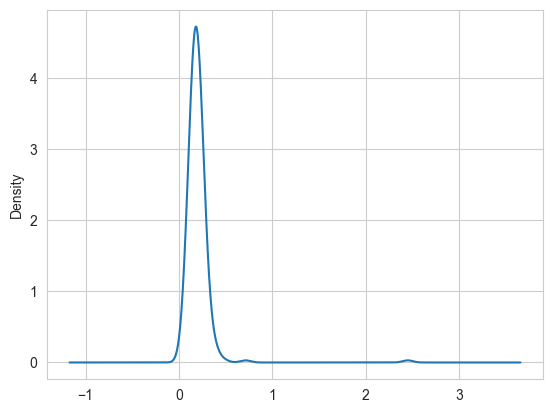

In [160]:
tips['tip_pct'].plot.density()

<Axes: ylabel='Count'>

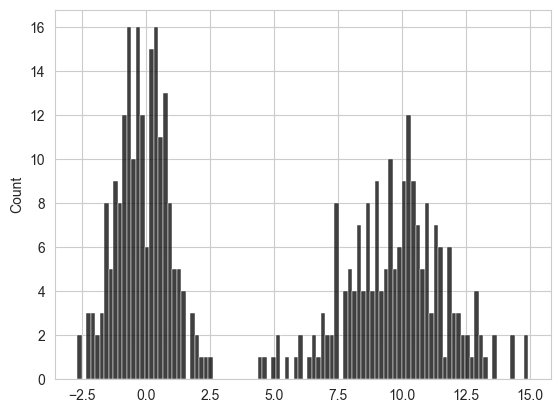

In [162]:
comp1 = np.random.standard_normal(200)
comp2 = 10+2*np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1,comp2]))
sns.histplot(values,bins=100,color='black')

## Scatter or Point Plots

In [163]:
macro = pd.read_csv('/Users/qian/Desktop/DATA/WESM/macrodata.csv')
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

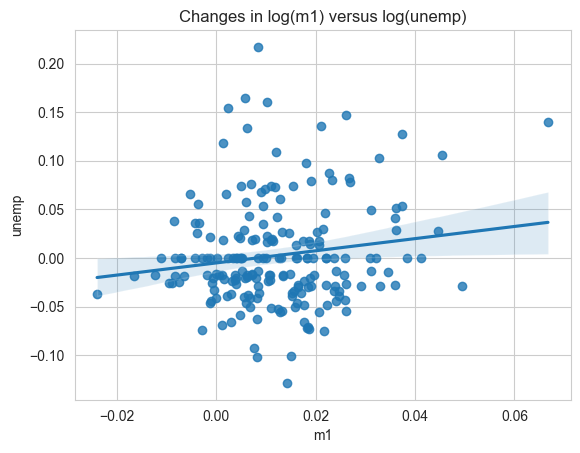

In [166]:
# use seaborn's regplot method, which makes a scatter plot and fits a linear
# regplot 同时包括了 散点图 和 回归线 以及 显示置信区间
ax = sns.regplot(x='m1',y='unemp',data = trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

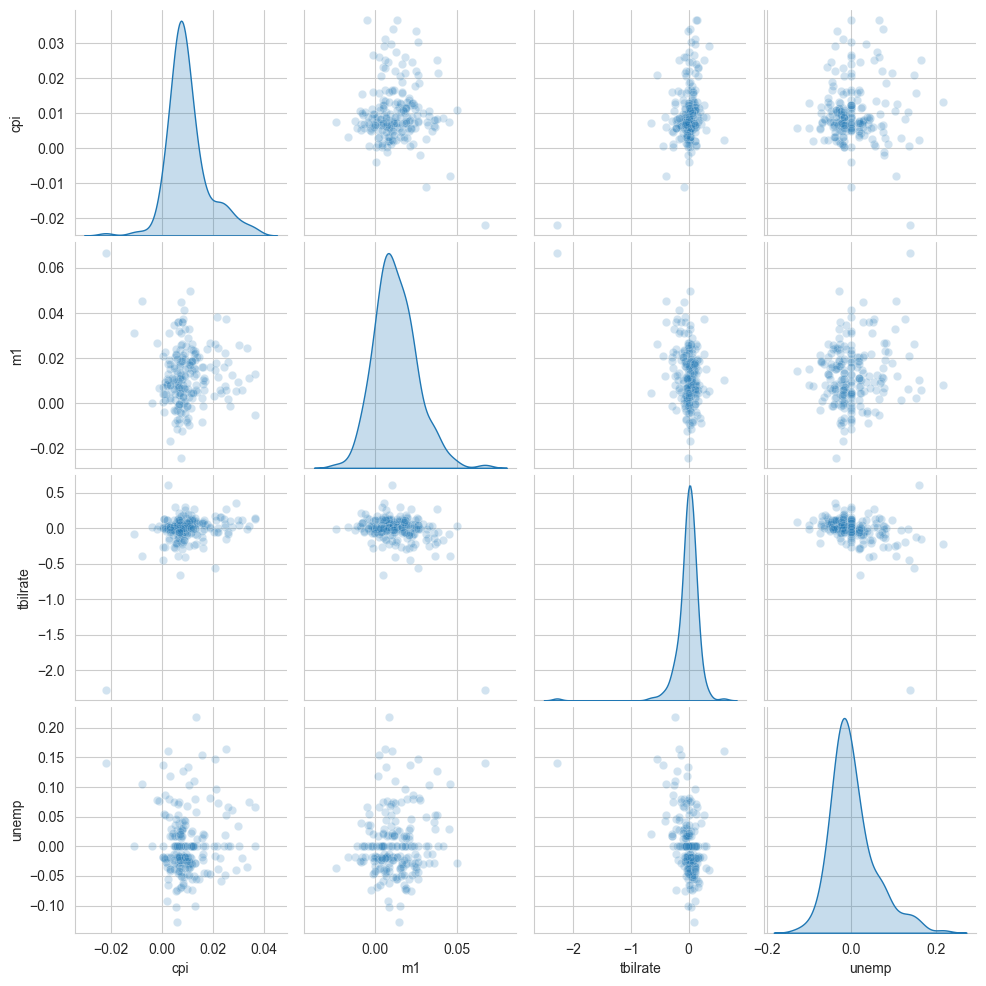

In [168]:
# 用于可视化多变量数据集中的变量关系。
#它会为数据集中每对变量绘制成对的图表（通常是散点图），并且可以在对角线上显示每个变量的分布情况。
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})


## Facet Grids and Categorical Data

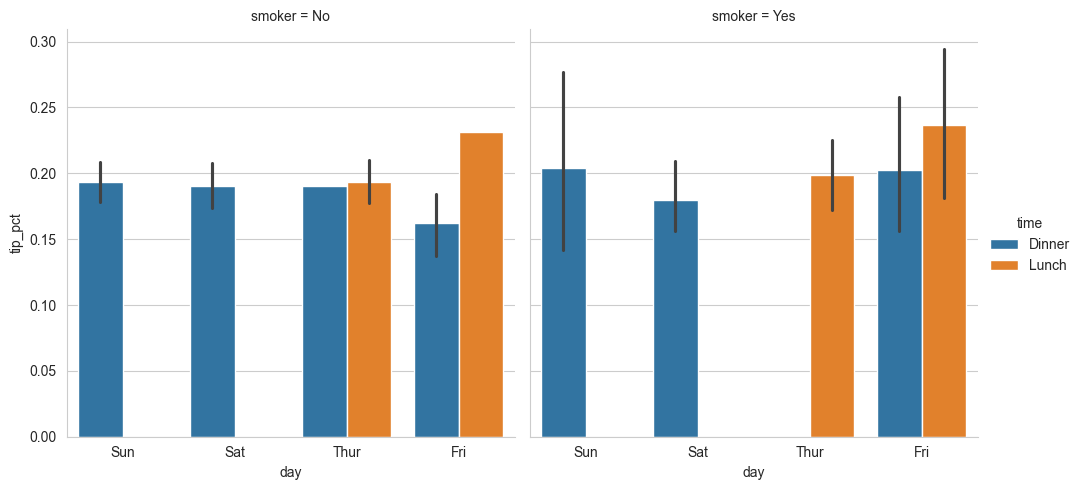

In [169]:
#catplot that simplifies making many kinds of faceted plots split by categorical variables 
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

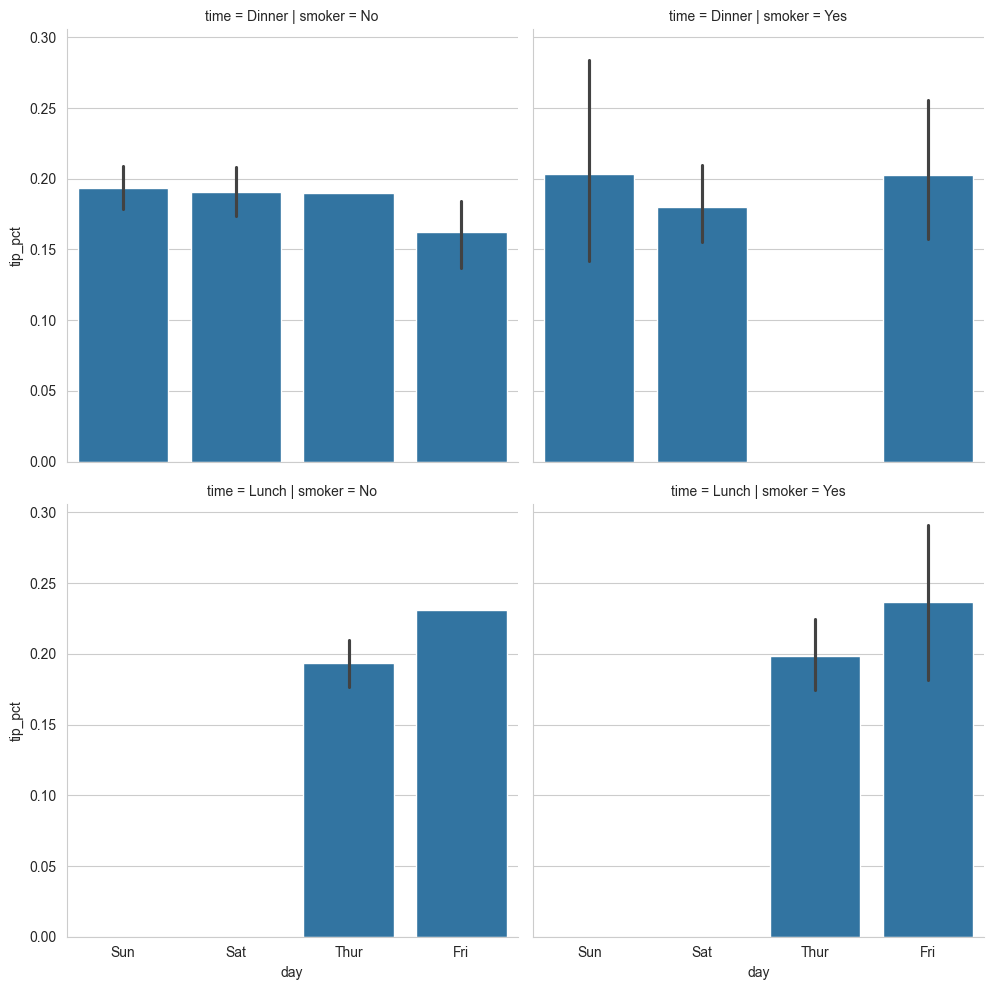

In [170]:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

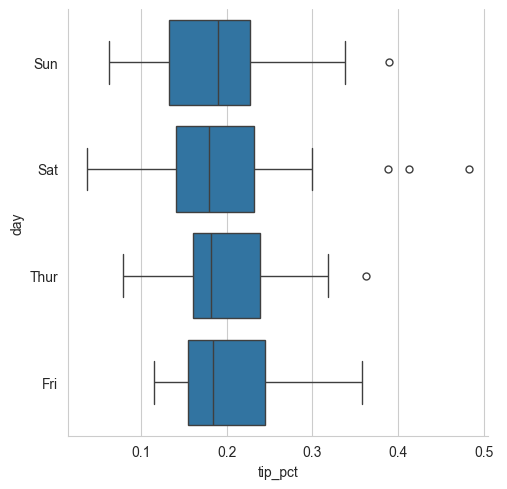

In [171]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])